# EasyOCR for Optical Character Recognition

### Install the necessary packages

In [ ]:
!pip install easyocr

In [2]:
%cd easy-ocr

/content/easy-ocr


### Import Packages

In [3]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [4]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Using EasyOCR for Optical Character Recognition

In [5]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [6]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/arabic_sign.jpg",
	"langs": "en,ar",
	"gpu": -1
}

In [7]:
# break the input languages into a comma separated list
langs = args["langs"].split(",")
print("[INFO] OCR'ing with the following languages: {}".format(langs))

# load the input image from disk
image = cv2.imread(args["image"])

# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(langs, gpu=args["gpu"] > 0)
results = reader.readtext(image)

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing with the following languages: ['en', 'ar']
[INFO] OCR'ing input image...


[INFO] 0.9994: EXIT
[INFO] 0.9831: خروج


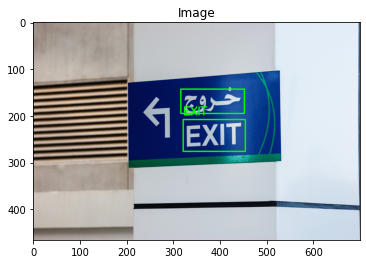

In [8]:
# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)